Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

**1**. (20 points)

- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](../data/vecs.png)

In [1]:
import numpy as np

In [2]:
theta = 30 * np.pi/180

r = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

In [3]:
s = np.diag([3, 0.5])

In [4]:
m = r @ s

In [5]:
minv = np.diag(1/np.diag(s)) @ r.T

In [6]:
m

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [7]:
m1 = m @ np.eye(2)

In [8]:
minv

array([[ 0.28867513,  0.16666667],
       [-1.        ,  1.73205081]])

In [9]:
m2 = minv @ m1

In [10]:
m1

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

**2**. (20 points)

- Given the DNA sequence below, create a $4 \times 4$ transition matrix $A$ where $A[i,j]$ is the probability of the base $j$ appearing immediately after base $i$. Note that a *base* is one of the four letters `a`, `c`, `t` or `g`. The letters below should be treated as a single sequence, broken into separate lines just for formatting purposes. You should check that row probabilities sum to 1. 
- Find the steady state distribution of the 4 bases from the row stochastic transition matrix - that is the, the values of $x$ for which $x^TA = x$ (You can solve this as a set of linear equations). Hint: you need to add a constraint on the values of $x$. 

```
gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct
```

In [11]:
dna = ''.join('''gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct'''.split())

d = {}
for i, j in zip(dna[:], dna[1:]):
    d[(i, j)] = d.get((i, j), 0) + 1
d

{('g', 'g'): 72,
 ('g', 't'): 37,
 ('t', 't'): 27,
 ('t', 'g'): 39,
 ('t', 'a'): 10,
 ('a', 't'): 13,
 ('t', 'c'): 22,
 ('c', 'a'): 14,
 ('a', 'c'): 11,
 ('c', 't'): 22,
 ('g', 'a'): 24,
 ('a', 'g'): 24,
 ('g', 'c'): 31,
 ('c', 'c'): 20,
 ('c', 'g'): 28,
 ('a', 'a'): 5}

In [12]:
A = np.array([[d[(i, j)] for j in 'actg'] for i in 'actg'])
A

array([[ 5, 11, 13, 24],
       [14, 20, 22, 28],
       [10, 22, 27, 39],
       [24, 31, 37, 72]])

In [13]:
A = A / A.sum(axis=1)[:, None]
A

array([[0.09433962, 0.20754717, 0.24528302, 0.45283019],
       [0.16666667, 0.23809524, 0.26190476, 0.33333333],
       [0.10204082, 0.2244898 , 0.2755102 , 0.39795918],
       [0.14634146, 0.18902439, 0.22560976, 0.43902439]])

In [14]:
A.sum(axis=1)

array([1., 1., 1., 1.])

### Solution using least squares

In [15]:
A1 = np.r_[A.T - np.eye(4), [[1,1,1,1]]]
A1

array([[-0.90566038,  0.16666667,  0.10204082,  0.14634146],
       [ 0.20754717, -0.76190476,  0.2244898 ,  0.18902439],
       [ 0.24528302,  0.26190476, -0.7244898 ,  0.22560976],
       [ 0.45283019,  0.33333333,  0.39795918, -0.56097561],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [16]:
b = np.r_[0,0,0,0,1].reshape(-1,1)

In [17]:
np.linalg.lstsq(A1, b, rcond=None)[0]

array([[0.1327228 ],
       [0.21062262],
       [0.24825335],
       [0.40840123]])

### Alternative solution using eigendecomposition

In [18]:
e, v = np.linalg.eig(A.T)
e, v

(array([ 1.        , -0.04809275,  0.08184718,  0.01321502]),
 array([[ 0.24629088,  0.80307077,  0.07979585, -0.57531671],
        [ 0.39084793, -0.10897781, -0.4285091 , -0.37179859],
        [ 0.46067847, -0.12086218, -0.43769407,  0.67636642],
        [ 0.7578615 , -0.57323077,  0.78640732,  0.27074888]]))

In [19]:
s = v[:, 0] / v[:, 0].sum()
s.reshape(-1,1)

array([[0.1327228 ],
       [0.21062262],
       [0.24825335],
       [0.40840123]])

**3**. (20 points) 

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

using gradient descent with RMSProp (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (25 points)

Plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [20]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [21]:
def f(beta, x):
    """Model function."""
    
    return beta[0]*x**2 + beta[1]*x**3 + beta[2]*np.sin(x)

In [22]:
def res(beta, x, y):
    """Resdiual funciton."""
    return f(beta, x) - y

In [23]:
def grad(beta, x, y):
    """Gradient of function."""
    
    return np.array([
        np.sum(x**2 * res(beta, x, y)),
        np.sum(x**3 * res(beta, x, y)),
        np.sum(np.sin(x) * res(beta, x, y))
    ])

In [24]:
def gd(beta, x, y, f, grad, alpha=0.01):
    """Gradient descent."""
    
    v = 0
    for i in range(10000):
        v = 0.9 * v + 0.1 * grad(beta, x, y)**2 
        beta = beta - (alpha * grad(beta, x, y))/(np.sqrt(v) + 1e-8)
    return beta

In [25]:
beta = gd(np.array([1,1,1]), x, y, f, grad)
beta

array([ 2.98759014, -0.20383227, 10.19524689])

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

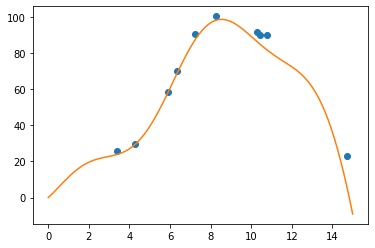

In [27]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**4**. (20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_1    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Write the system in matrix form $Ax=b$ and define these in numpy or scipy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.

In [28]:
A = np.array([
    [2, -1, 1],
    [-1, 2, -1],
    [1, -1, 1]
])

In [29]:
b = np.array([6,2,1]).reshape(-1,1)

In [30]:
import scipy.linalg as la

In [31]:
la.eigvalsh(A)

array([0.26794919, 1.        , 3.73205081])

Since all eigenvalues are positive, $A$ is positive definite.

In [32]:
C = la.cholesky(A, lower=True)
y = la.solve_triangular(C, b, lower=True)
x = la.solve_triangular(C.T, y, lower=False)

In [33]:
x

array([[ 5.],
       [ 3.],
       [-1.]])

In [34]:
A @ x

array([[6.],
       [2.],
       [1.]])

**Alternative**

In [35]:
la.cho_solve(la.cho_factor(A), b)

array([[ 5.],
       [ 3.],
       [-1.]])

**5**. (20 points)

Let

$A = \left(\begin{matrix}2 & -1 &1\\-1& 2& -1 \\1&-1& 1
\end{matrix}\right) \;\;\;\;\;\;\textrm{ and }\;\;\;\;\;\; v = \left(\begin{matrix}1 \\ 1 \\2\end{matrix}\right)$

Find $w$ such that $w$ is conjugate to $v$ under $A$. You may use *basic* linear algebra in scipy or numpy - i.e. matrix products.

### Comments

There is an entire plane in $\mathbb{R}^2$ orthogoal to $v$. Any vector in the plane will do. Ideally, you should use Gram-Shmiidt (or at least the projection part) since this will generalize to arbitrary matrices $A$, but I did not take off points if you used some other method.

In [36]:
A = np.array([[2,-1,1],[-1,2,-1],[1,-1,1]])
v = np.array([1,1,2])

# We just need to choose any vector that is NOT colinear with v, and then subtract 
# the projection in the inner product defined by A

w_init = np.array([0,1,0])

w = w_init - ((w_init.dot(A.dot(v)))/(v.dot(A.dot(v))))*v

w, w.dot(A.dot(v))

(array([0.16666667, 1.16666667, 0.33333333]), -1.1102230246251565e-16)